In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

### Read data

In [2]:
df=pd.read_excel('Data1.xlsx')

In [3]:
df[0:8]

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0
5,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,285.38,61,10,0.0
6,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,331.70,36,10,0.0
7,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,45-54,0.00,4,0,0.0


In [4]:
df.columns

Index(['Date', 'product', 'phase', 'campaign_platform', 'campaign_type',
       'communication_medium', 'subchannel', 'audience_type', 'creative_type',
       'creative_name', 'device', 'age', 'spends', 'impressions', 'clicks',
       'link_clicks'],
      dtype='object')

In [5]:
df.dtypes

Date                    datetime64[ns]
product                         object
phase                           object
campaign_platform               object
campaign_type                   object
communication_medium            object
subchannel                      object
audience_type                   object
creative_type                   object
creative_name                   object
device                          object
age                             object
spends                         float64
impressions                      int64
clicks                           int64
link_clicks                    float64
dtype: object

In [6]:
print(len(df))
print(len(df.columns))

16834
16


In [7]:
df.describe()

,spends,impressions,clicks,link_clicks
count,16834.000000,16834.000000,16834.000000,16288.000000
mean,148.694236,287.959190,11.977783,2.170371
std,483.895724,2444.450313,44.796963,18.659132
min,0.000000,0.000000,0.000000,0.000000
25%,0.180000,3.000000,0.000000,0.000000
50%,22.535000,13.000000,2.000000,0.000000
75%,110.020000,64.000000,8.000000,0.000000
max,9221.960000,67454.000000,1075.000000,450.000000


Four numerical variables (spends, impressions, clicks,link_clicks), the date variable, and remaining are categorical variables

In [8]:
categorical=['product', 'phase', 'campaign_platform', 'campaign_type',
       'communication_medium', 'subchannel', 'audience_type', 'creative_type',
       'creative_name', 'device', 'age']

In [10]:
from collections import Counter
for i in categorical:
    print(Counter(df[i]))

Counter({'Product 1': 16834})
Counter({'Performance': 16834})
Counter({'Google Ads': 15101, 'Facebook Ads': 1733})
Counter({'Search': 15101, 'Conversions': 1733})
Counter({'Search Keywords': 15101, 'Creative': 1733})
Counter({'Brand': 7853, 'Generic': 4544, 'Competitor': 2704, 'Facebook Ads': 1733})
Counter({"'-": 15101, 'Audience 1': 813, 'Audience 2': 738, 'Audience 3': 182})
Counter({"'-": 15101, 'Image': 1130, 'Carousal': 603})
Counter({"'-": 15101, 'Click': 644, 'Carousal': 603, 'Girl': 486})
Counter({'Mobile': 7357, 'Desktop': 6318, 'device': 1733, 'Tablet': 1426})
Counter({'25-34': 3097, '35-44': 2865, 'Undetermined': 2586, '45-54': 2499, '18-24': 2472, '55-64': 1757, '65 or more': 1558})


### Insights

The entire dataset contains information about Product 1 alone. <br>The 'phase' variable is Performance for all entries
<br> Therefore, these two variable cannot be used to discriminate between any entry and can be dropped<br>

The campaign type for google ads is search, since these ads are brought into contact with the audience via google search. In contrast, the facebook ads are all of type conversions, with respect to engagement with user posts. <br>

The communication medium for all google ads is search key words, and for facebook ads is creative posts such as image, carousel etc.



In [11]:
import calendar
df['Day']=[i.weekday() for i in df.Date]
df['Day']=[calendar.day_name[i] for i in df.Day]

In [12]:
df.Day

0        Wednesday
1        Wednesday
2        Wednesday
3        Wednesday
4           Friday
           ...    
16829      Tuesday
16830      Tuesday
16831      Tuesday
16832      Tuesday
16833      Tuesday
Name: Day, Length: 16834, dtype: object

In [13]:
fb=df[df.campaign_platform=='Facebook Ads']
goog=df[df.campaign_platform=='Google Ads']

In [14]:
for i in categorical:
    print(Counter(fb[i]))

Counter({'Product 1': 1733})
Counter({'Performance': 1733})
Counter({'Facebook Ads': 1733})
Counter({'Conversions': 1733})
Counter({'Creative': 1733})
Counter({'Facebook Ads': 1733})
Counter({'Audience 1': 813, 'Audience 2': 738, 'Audience 3': 182})
Counter({'Image': 1130, 'Carousal': 603})
Counter({'Click': 644, 'Carousal': 603, 'Girl': 486})
Counter({'device': 1733})
Counter({'25-34': 488, '35-44': 485, '45-54': 477, '55-64': 283})


In [15]:
for i in categorical:
    print(Counter(goog[i]))

Counter({'Product 1': 15101})
Counter({'Performance': 15101})
Counter({'Google Ads': 15101})
Counter({'Search': 15101})
Counter({'Search Keywords': 15101})
Counter({'Brand': 7853, 'Generic': 4544, 'Competitor': 2704})
Counter({"'-": 15101})
Counter({"'-": 15101})
Counter({"'-": 15101})
Counter({'Mobile': 7357, 'Desktop': 6318, 'Tablet': 1426})
Counter({'25-34': 2609, 'Undetermined': 2586, '18-24': 2472, '35-44': 2380, '45-54': 2022, '65 or more': 1558, '55-64': 1474})


The audience_type varible is redundant for google ads, as this information only has values for the facebook ads. Like-wise, creative type and creative name are only available for facebook ads, as google ads are placed not through creatives but through searches. <br> 
Subchannel and device are only available for google ads

Therefore, the only attributes common to both facebook and google ads are the age group, clicks, link clicks, impressions and spends.

#### Hence for initial analysis, the two categories will be explored separately.

## Facebook Ads

### Dataset granularity
Each records show the perfmance of of one ad on a particular age group for a particular audience type

In [16]:
fb.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks,Day
2009,2019-12-16,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Carousal,Carousal,device,25-34,70.28,730,12,9.0,Monday
2010,2019-12-16,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Carousal,Carousal,device,35-44,7.66,71,1,1.0,Monday
2011,2019-12-16,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Carousal,Carousal,device,45-54,3.80,32,1,NaN,Monday
2012,2019-12-16,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Carousal,Carousal,device,55-64,0.45,3,0,NaN,Monday
2013,2019-12-16,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Image,Click,device,25-34,117.13,638,36,21.0,Monday


In [17]:
for i in categorical:
    print(i,"                        ",Counter(fb[i]))

product                          Counter({'Product 1': 1733})
phase                          Counter({'Performance': 1733})
campaign_platform                          Counter({'Facebook Ads': 1733})
campaign_type                          Counter({'Conversions': 1733})
communication_medium                          Counter({'Creative': 1733})
subchannel                          Counter({'Facebook Ads': 1733})
audience_type                          Counter({'Audience 1': 813, 'Audience 2': 738, 'Audience 3': 182})
creative_type                          Counter({'Image': 1130, 'Carousal': 603})
creative_name                          Counter({'Click': 644, 'Carousal': 603, 'Girl': 486})
device                          Counter({'device': 1733})
age                          Counter({'25-34': 488, '35-44': 485, '45-54': 477, '55-64': 283})


### Indepth Analysis of Facebook Ads

In [137]:
fb1=fb[['Date','audience_type', 'creative_type',
       'creative_name',  'age','spends', 'impressions', 'clicks',
       'link_clicks','Day']]
fb1

,Date,audience_type,creative_type,creative_name,age,spends,impressions,clicks,link_clicks,Day
2009,2019-12-16,Audience 2,Carousal,Carousal,25-34,70.280000,730,12,9.0,Monday
2010,2019-12-16,Audience 2,Carousal,Carousal,35-44,7.660000,71,1,1.0,Monday
2011,2019-12-16,Audience 2,Carousal,Carousal,45-54,3.800000,32,1,NaN,Monday
2012,2019-12-16,Audience 2,Carousal,Carousal,55-64,0.450000,3,0,NaN,Monday
2013,2019-12-16,Audience 2,Image,Click,25-34,117.130000,638,36,21.0,Monday
...,...,...,...,...,...,...,...,...,...,...
13808,2020-03-20,Audience 1,Image,Click,55-64,6.409971,68,1,NaN,Friday
13809,2020-03-20,Audience 1,Image,Girl,25-34,255.620000,1895,30,11.0,Friday
13810,2020-03-20,Audience 1,Image,Girl,35-44,89.060000,764,7,1.0,Friday
13811,2020-03-20,Audience 1,Image,Girl,45-54,24.350000,228,11,3.0,Friday


## Date

### GroupBy Sum per day

In [138]:
dt=fb1.groupby(['Date']).agg('sum')

In [139]:
dt.head()

,spends,impressions,clicks,link_clicks
Date,,,,
2019-12-16,592.26,3662,145,83.0
2019-12-17,1932.17,13975,342,231.0
2019-12-18,2007.18,13384,531,301.0
2019-12-19,1999.79,13539,424,234.0
2019-12-20,2002.92,13367,517,285.0


### GroupBy  Average (per post per day)

In [140]:
dt1=fb1.groupby(['Date']).agg('mean')

In [141]:
dt1.head()

,spends,impressions,clicks,link_clicks
Date,,,,
2019-12-16,28.202857,174.380952,6.904762,6.916667
2019-12-17,87.825909,635.227273,15.545455,12.157895
2019-12-18,91.235455,608.363636,24.136364,16.722222
2019-12-19,90.899545,615.409091,19.272727,14.625000
2019-12-20,95.377143,636.523810,24.619048,19.000000


### Plot

### Time series of total spendings vs date

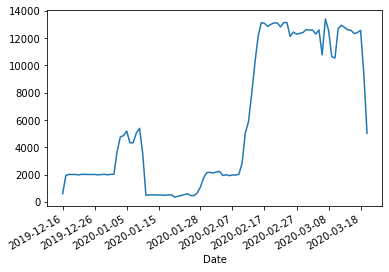

In [142]:
ts=pd.Series(dt.spends,index=dt.index)
ixs=[]
j=0
for i in dt.index:
    if(j%10==0):
        ixs.append(i)
    j+=1
ax=ts.plot()
ax.set_xticks(ixs)
plt.show()

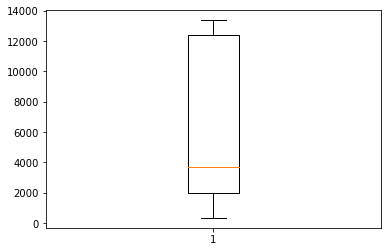

In [146]:
z=plt.boxplot(ts)

### Average spending vs date

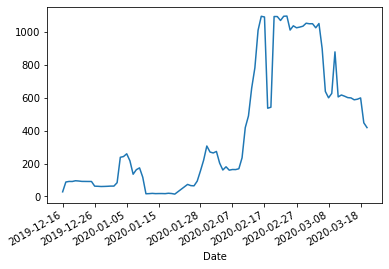

In [144]:
from matplotlib.pyplot import figure
ts1=pd.Series(dt1.spends,index=dt.index)
ax1=ts1.plot()
ax1.set_xticks(ixs)
plt.show()

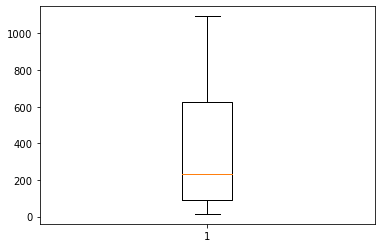

In [147]:
z=plt.boxplot(ts1)

While the two graphs are fairly similar,some major differences at some points indicate, that high spending occured on a particular day simply because more ads were posted and this didn't necessarily mean that the ads individually were successful, as seen in the low per ad spending for those particular days

#### Ten busiest days in terms of expenditure

In [439]:
dt.sort_values(by='spends',ascending=False).head(10)

,spends,impressions,clicks,link_clicks
Date,,,,
2020-03-07,13375.590000,93926,1325,576.0
2020-02-24,13127.040000,95749,1585,662.0
2020-02-23,13114.659999,87422,1647,702.0
2020-02-16,13112.360000,70787,1547,709.0
2020-02-20,13094.300000,68816,1220,554.0
2020-02-21,13093.100000,72304,1407,576.0
2020-02-17,13059.940000,81965,1490,667.0
2020-02-19,12990.190000,81145,1352,586.0
2020-03-12,12923.470000,98784,1533,633.0


#### Ten days with least spending

In [440]:
dt.sort_values(by='spends').head(10)

,spends,impressions,clicks,link_clicks
Date,,,,
2020-01-20,345.02,3686,111,62.0
2020-01-26,451.58,3057,141,75.0
2020-01-25,461.29,3877,178,86.0
2020-01-11,476.58,3637,171,84.0
2020-01-17,480.96,3909,185,93.0
2020-01-15,498.12,4469,195,98.0
2020-01-16,499.28,4738,233,103.0
2020-01-14,501.71,4591,204,94.0
2020-01-19,503.71,4047,172,90.0


## Impressions vs days

### Total impressions vs days

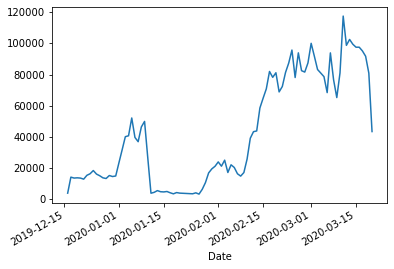

In [441]:
ts=pd.Series(dt.impressions,index=dt.index)
ts.plot()

In [442]:
dt.sort_values(by='impressions',ascending=False)['impressions'].head(10)

Date
2020-03-11    117611
2020-03-13    102576
2020-03-01    100080
2020-03-14     99505
2020-03-12     98784
2020-03-15     97583
2020-03-16     97581
2020-02-24     95749
2020-03-17     95185
2020-02-26     93953
Name: impressions, dtype: int64

## Impressions/post vs days

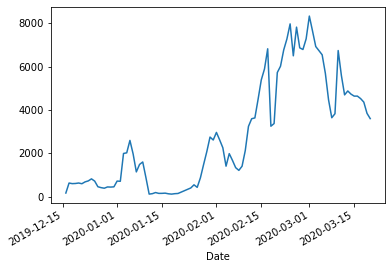

In [443]:
ts1=pd.Series(dt1.impressions,index=dt.index)
ts1.plot()

## Clicks vs date

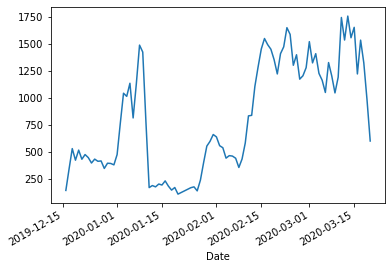

In [444]:
ts=pd.Series(dt.clicks,index=dt.index)
ts.plot()

## Link clicks vs date

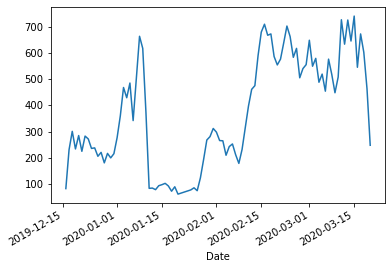

In [445]:
ts=pd.Series(dt.link_clicks,index=dt.index)
ts.plot()

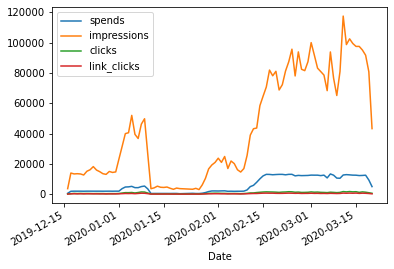

In [446]:
ts=pd.DataFrame(dt[['spends','impressions','clicks','link_clicks']],index=dt.index)
ts.plot()

## Stats Vs Weekday

In [447]:
fb

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks,Day
2009,2019-12-16,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Carousal,Carousal,device,25-34,70.280000,730,12,9.0,Monday
2010,2019-12-16,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Carousal,Carousal,device,35-44,7.660000,71,1,1.0,Monday
2011,2019-12-16,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Carousal,Carousal,device,45-54,3.800000,32,1,NaN,Monday
2012,2019-12-16,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Carousal,Carousal,device,55-64,0.450000,3,0,NaN,Monday
2013,2019-12-16,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Image,Click,device,25-34,117.130000,638,36,21.0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,2020-03-20,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 1,Image,Click,device,55-64,6.409971,68,1,NaN,Friday
13809,2020-03-20,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 1,Image,Girl,device,25-34,255.620000,1895,30,11.0,Friday
13810,2020-03-20,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 1,Image,Girl,device,35-44,89.060000,764,7,1.0,Friday
13811,2020-03-20,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 1,Image,Girl,device,45-54,24.350000,228,11,3.0,Friday


In [449]:
wk=fb1.groupby('Day').agg('sum')
wk

,spends,impressions,clicks,link_clicks
Day,,,,
Friday,81526.910000,564288,11507,5175.0
Monday,77142.380000,571564,10114,4613.0
Saturday,77584.190001,542518,10364,4648.0
Sunday,78813.399999,563976,11065,5050.0
Thursday,85758.630000,607339,11493,5203.0
Tuesday,79219.940000,570375,11009,5094.0
Wednesday,84070.060000,650552,12017,5568.0


In [450]:
wk=fb1.groupby('Day').agg('mean')
wk

,spends,impressions,clicks,link_clicks
Day,,,,
Friday,338.285934,2341.443983,47.746888,30.441176
Monday,308.569520,2286.256000,40.456000,27.789157
Saturday,331.556368,2318.452991,44.290598,30.781457
Sunday,332.545992,2379.645570,46.687764,31.366460
Thursday,322.400865,2283.229323,43.206767,29.395480
Tuesday,318.152369,2290.662651,44.212851,28.943182
Wednesday,328.398672,2541.218750,46.941406,29.935484


### Insight No significant variation is noted for different days of the week

## By audience

In [325]:
ta=fb1.groupby(['audience_type','Date']).agg('sum')
ta.head()

spends  impressions  clicks  link_clicks
audience_type Date                                                 
Audience 1    2020-01-07  1539.27        11051     570        251.0
              2020-01-08  4632.57        41104    1382        604.0
              2020-01-09  4803.40        43390    1278        539.0
              2020-01-10  3147.89        22789     698        333.0
              2020-01-11   414.24         3009     147         74.0

### Audience 1 vs time

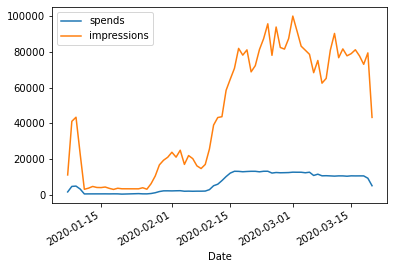

In [337]:
a1=fb1[fb1['audience_type']=='Audience 1'].groupby('Date').agg('sum')
a1[['spends','impressions']].plot()

#### Insights
Audience 1 had peak expenditure and engagment with the ads betwenn 15-Feb and 15 March

### Audience 2 vs time

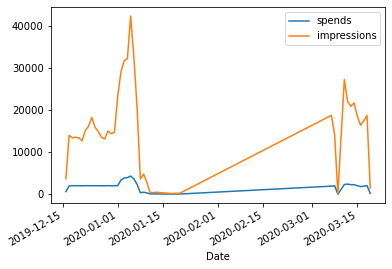

In [338]:
a2=fb1[fb1['audience_type']=='Audience 2'].groupby('Date').agg('sum')
a2[['spends','impressions']].plot()

#### Insights
Audience 2 had peak expenditure and engagment at the start of the new year and again towards the end of the dataset in mid March

### Audience 3 vs time

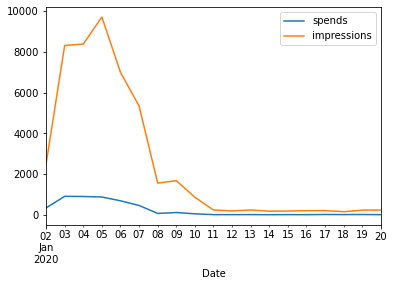

In [339]:
a3=fb1[fb1['audience_type']=='Audience 3'].groupby('Date').agg('sum')
a3[['spends','impressions']].plot()

Data for audience 3 in only available from Jan 2 to 20 and peaks on 5th Jan 2020

<BarContainer object of 12 artists>

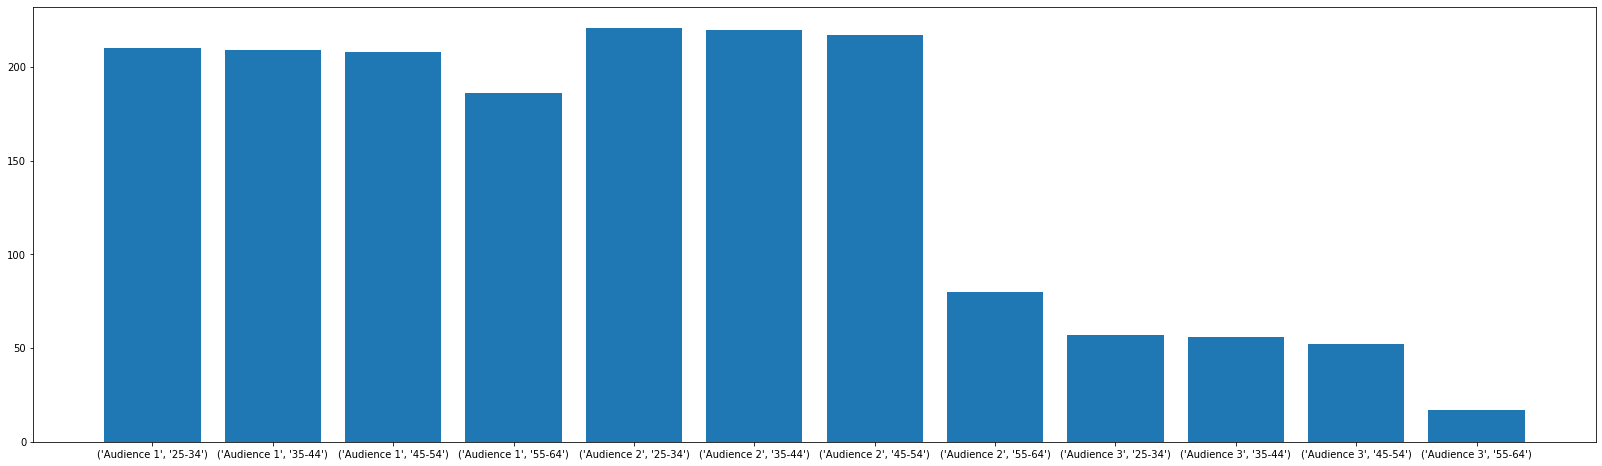

In [349]:
ta=fb1.groupby(['audience_type','age']).agg('count')['Date']
fig = plt.figure(figsize=(28,8))

plt.bar([str(i) for i in ta.index],ta)


The audience is equal across 4 age groups for Audience 1<br>
However for Audience 2 and 3, the age group 55-64 is much lower than other 3 age groups

## Creative type

<BarContainer object of 2 artists>

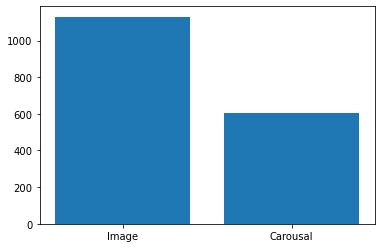

In [99]:
x=fb1.creative_type.value_counts()
plt.bar(x.index,x.values)

In [355]:
fb1.groupby(['creative_type']).agg('mean')

,spends,impressions,clicks,link_clicks
creative_type,,,,
Carousal,84.921609,680.220564,9.152570,10.664804
Image,453.900690,3239.326549,63.761062,38.037394


## Insights
On a per ad basis, engagement, clicks and spending as response to images is much more than carousels

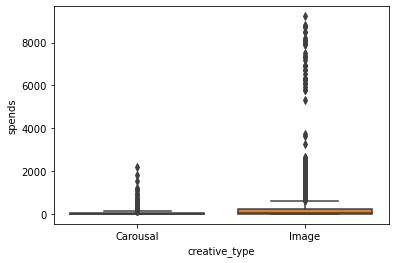

In [149]:
import seaborn as sns
x=sns.boxplot(y=fb1.spends,x=fb1.creative_type)

## Creative name

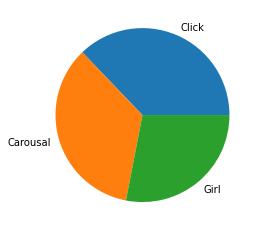

In [234]:
x=fb1.creative_name.value_counts()
ax=plt.pie(x.values,labels=x.index)
plt.show()

In [62]:
fb.groupby(['creative_name']).agg(['mean'])

,spends,impressions,clicks,link_clicks
,mean,mean,mean,mean
creative_name,,,,
Carousal,84.921609,680.220564,9.152570,10.664804
Click,712.014643,4881.226708,95.822981,52.658252
Girl,111.873148,1063.639918,21.275720,14.057325


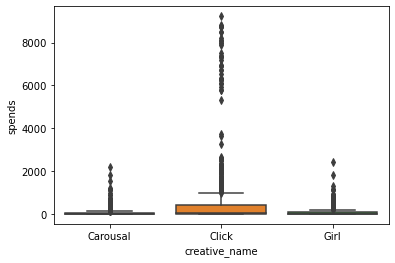

In [359]:
import seaborn as sns
sns.boxplot(y=fb1.spends,x=fb1.creative_name)

## Age

In [243]:
x=fb1[['Date','age']].groupby(['age']).agg('count')
x

,Date
age,
25-34,488
35-44,485
45-54,477
55-64,283


There are no records for 18-24 year olds or 65+ year olds in the facebook campaigns

<BarContainer object of 4 artists>

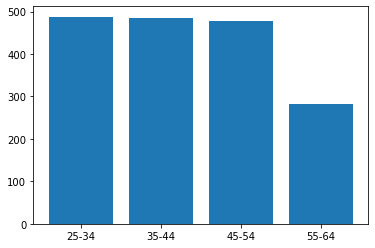

In [255]:
plt.bar(x.index,x['Date'])

## Age vs total spend,impressions, clicks etc

In [456]:
ag=fb1.groupby(['age']).agg('sum')

In [457]:
ag

,spends,impressions,clicks,link_clicks
age,,,,
25-34,431172.653349,3087201,57782,26461.0
35-44,108597.139436,798342,15723,7016.0
45-54,23467.716581,178109,3932,1812.0
55-64,878.000634,6960,132,62.0


#### By far, the group to respond , spend and engage the most with the ad campgain is the 25-34 age group

The 25-34 year old group has 4 times,40 times and 500 times as much interaction and spending as the 35-44, 45-54 and 55-64 age groups

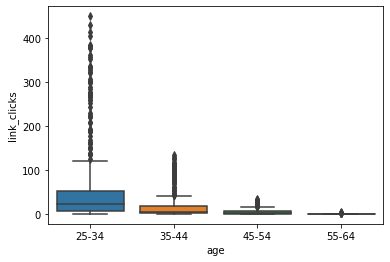

In [458]:
import seaborn as sns
sns.boxplot(y=fb1.link_clicks,x=fb1.age)

### Age vs creative and communication type

In [512]:
fb1.groupby(['creative_type']).agg('count')

,Date,audience_type,creative_name,age,spends,impressions,clicks,link_clicks,Day
creative_type,,,,,,,,,
Carousal,603,603,603,603,603,603,603,358,603
Image,1130,1130,1130,1130,1130,1130,1130,829,1130


In [513]:
cr=fb1.groupby(['age','creative_type']).agg('mean')

In [514]:
cr=cr[['spends']]
cr

spends
age   creative_type             
25-34 Carousal        252.013116
      Image          1242.978559
35-44 Carousal         30.769216
      Image           331.972013
45-54 Carousal          7.250688
      Image            71.796296
55-64 Carousal          0.431765
      Image             4.248993

In [515]:
cr=cr.unstack()
cr

spends             
creative_type    Carousal        Image
age                                   
25-34          252.013116  1242.978559
35-44           30.769216   331.972013
45-54            7.250688    71.796296
55-64            0.431765     4.248993

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000284CECC9860>,
      dtype=object)

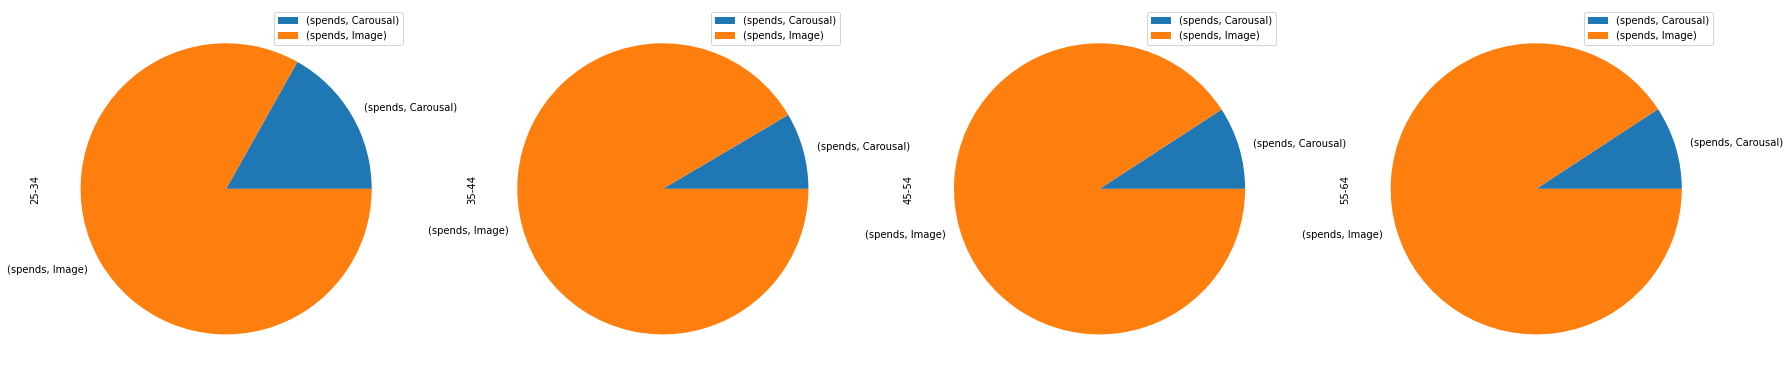

In [516]:
cr.T.plot.pie(subplots=True, figsize=(30, 20))

#### Insights :
While all age groups respond to images more than carousels, the gap widens even further as the age increases. <br>
People in the age group of 25-34 are 5 times as likely to spend on images than carousals, whereas those in the other three categories spend 10 times more on image ads than carousals

### Age vs creative name

In [523]:
cr=fb1.groupby(['age','creative_name']).agg('mean')

In [524]:
cr=cr[['spends']]
cr=cr.unstack()
cr

spends                         
creative_name    Carousal        Click        Girl
age                                               
25-34          252.013116  1975.416530  288.096464
35-44           30.769216   517.999780   89.446923
45-54            7.250688   107.850223   24.441884
55-64            0.431765     6.159657    1.546102

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000284CE5977B8>,
      dtype=object)

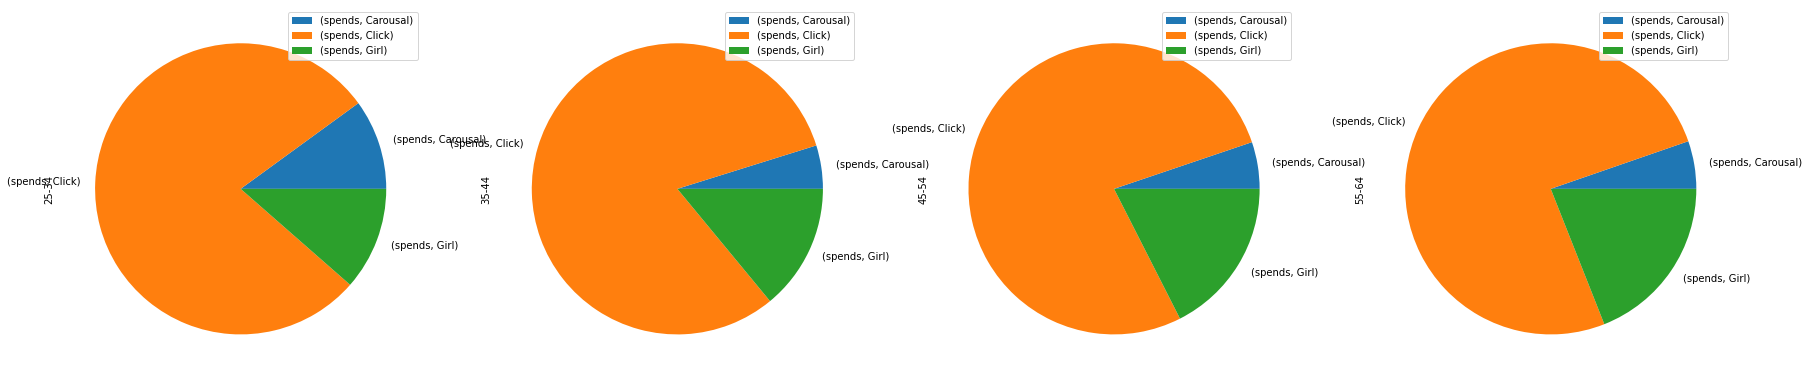

In [525]:
cr.T.plot.pie(subplots=True, figsize=(30, 20))

#### Insights For creative-names :
For all age groups , in the following order : <br>
Images <br>
Girl <br>
Carousel <br>
With increase in age, the users respond less to carousel and more to girl

### Spends per impression, click and link click

In [19]:
ag=fb1.groupby('age').agg('sum')

In [20]:
ag

,spends,impressions,clicks,link_clicks
age,,,,
25-34,431172.653349,3087201,57782,26461.0
35-44,108597.139436,798342,15723,7016.0
45-54,23467.716581,178109,3932,1812.0
55-64,878.000634,6960,132,62.0


In [21]:
ag['s-i']=ag.spends/ag.impressions
ag['s-l']=ag.spends/ag.link_clicks
ag['s-c']=ag.spends/ag.clicks
ag['l-i']=ag.link_clicks/ag.impressions*100
ag['c-i']=ag.clicks/ag.impressions*100

In [22]:
ag

,spends,impressions,clicks,link_clicks,s-i,s-l,s-c,l-i,c-i
age,,,,,,,,,
25-34,431172.653349,3087201,57782,26461.0,0.139665,16.294647,7.462058,0.857119,1.871663
35-44,108597.139436,798342,15723,7016.0,0.136028,15.478498,6.906897,0.878821,1.969457
45-54,23467.716581,178109,3932,1812.0,0.131760,12.951278,5.968392,1.017355,2.207637
55-64,878.000634,6960,132,62.0,0.126150,14.161301,6.651520,0.890805,1.896552


#### Insights :
The PER VIEW/IMPRESSION spends, clicks and link clicks don't differ too much across all categories. <br>
The tendency to spend decreases with age. 25-34 years old have the highest spends/impression (0.1396) and 55-64 year olds have the lowest at 0.1261 <br>
However, spends/link-click and spends/click are lowest among 44-54 year olds, while remaining highest among 25-34 year olds. <br>
Interestingly, older people are likelier to click on links or posts after viewing compared to younger people, with the highest clicks/impression and links_click/impression in the 45-54 category

## ML Model for prediction of spends/earnings from a post

In [23]:
fb2=fb[['Day' ,'audience_type', 'creative_type',
       'creative_name', 'age', 'spends', 'impressions', 'clicks']]
fb2

,Day,audience_type,creative_type,creative_name,age,spends,impressions,clicks
2009,Monday,Audience 2,Carousal,Carousal,25-34,70.280000,730,12
2010,Monday,Audience 2,Carousal,Carousal,35-44,7.660000,71,1
2011,Monday,Audience 2,Carousal,Carousal,45-54,3.800000,32,1
2012,Monday,Audience 2,Carousal,Carousal,55-64,0.450000,3,0
2013,Monday,Audience 2,Image,Click,25-34,117.130000,638,36
...,...,...,...,...,...,...,...,...
13808,Friday,Audience 1,Image,Click,55-64,6.409971,68,1
13809,Friday,Audience 1,Image,Girl,25-34,255.620000,1895,30
13810,Friday,Audience 1,Image,Girl,35-44,89.060000,764,7
13811,Friday,Audience 1,Image,Girl,45-54,24.350000,228,11


In [24]:
#Converts all the categorical data to numerical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
fb2['Day']=le.fit_transform(fb['Day'])
fb2['audience_type']=le.fit_transform(fb2['audience_type'])
fb2['creative_type']=le.fit_transform(fb2['creative_type'])
fb2['creative_name']=le.fit_transform(fb2['creative_name'])
fb2['age']=le.fit_transform(fb2['age'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [25]:
fb2

,Day,audience_type,creative_type,creative_name,age,spends,impressions,clicks
2009,1,1,0,0,0,70.280000,730,12
2010,1,1,0,0,1,7.660000,71,1
2011,1,1,0,0,2,3.800000,32,1
2012,1,1,0,0,3,0.450000,3,0
2013,1,1,1,1,0,117.130000,638,36
...,...,...,...,...,...,...,...,...
13808,0,0,1,1,3,6.409971,68,1
13809,0,0,1,2,0,255.620000,1895,30
13810,0,0,1,2,1,89.060000,764,7
13811,0,0,1,2,2,24.350000,228,11


In [26]:
X=fb2.loc[:, fb2.columns !='spends']
Y=fb2['spends']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(max_depth=8, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

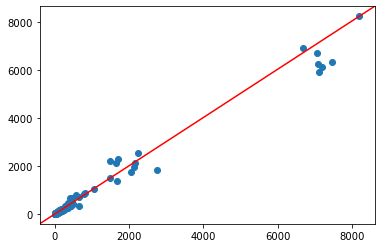

In [60]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
fig, ax = plt.subplots()
ax.scatter(regr.predict(X_test),y_test)
line = mlines.Line2D([0,1], [0,1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

Since most of the data lies in and around y=x, the predicted values are fairly close to actual values

In [74]:
p=regr.predict(X_test)
d=pd.DataFrame()
d['p']=p
d['y']=y_test.values
d['err']=abs(y_test.values-p)
d

,p,y,err
0,147.806799,81.63,66.176799
1,32.509055,30.92,1.589055
2,7.717760,8.00,0.282240
3,1.596484,0.80,0.796484
4,73.990380,43.57,30.420380
...,...,...,...
169,6695.216998,6905.75,210.533002
170,57.453731,59.44,1.986269
171,95.273498,121.63,26.356502
172,0.520039,0.03,0.490039


## Brief Analysis of Google Ads

In [87]:
goog=df[df.campaign_platform=='Google Ads']

In [88]:
goog.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks,Day
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0,Wednesday
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0,Wednesday
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0,Wednesday
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0,Wednesday
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0,Friday


In [89]:
for i in categorical:
    print(Counter(goog[i]))

Counter({'Product 1': 15101})
Counter({'Performance': 15101})
Counter({'Google Ads': 15101})
Counter({'Search': 15101})
Counter({'Search Keywords': 15101})
Counter({'Brand': 7853, 'Generic': 4544, 'Competitor': 2704})
Counter({"'-": 15101})
Counter({"'-": 15101})
Counter({"'-": 15101})
Counter({'Mobile': 7357, 'Desktop': 6318, 'Tablet': 1426})
Counter({'25-34': 2609, 'Undetermined': 2586, '18-24': 2472, '35-44': 2380, '45-54': 2022, '65 or more': 1558, '55-64': 1474})


Redundant variables :  product, phase, campaign_platform, campaign_type, communication_medium, audience_type, creative_type and creative_name

### Insights : All google ads have campaign type as search, communication method as search keywords, subchannel falling into one of three categories (brand, generic, competitor), no information on audience_type	creative_type	creative_name since these parameters don't apply here.

In [90]:
goog.describe()

,spends,impressions,clicks,link_clicks
count,15101.000000,15101.000000,15101.000000,15101.0
mean,128.402308,51.446460,8.215681,0.0
std,343.175609,108.860186,17.069159,0.0
min,0.000000,0.000000,0.000000,0.0
25%,0.000000,3.000000,0.000000,0.0
50%,23.040000,11.000000,2.000000,0.0
75%,107.170000,45.000000,7.000000,0.0
max,5004.380000,1788.000000,328.000000,0.0


In [91]:
goog=goog[['Date','subchannel', 'device', 'age','spends','impressions','clicks','Day']]

In [92]:
goog.describe()

,spends,impressions,clicks
count,15101.000000,15101.000000,15101.000000
mean,128.402308,51.446460,8.215681
std,343.175609,108.860186,17.069159
min,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000
50%,23.040000,11.000000,2.000000
75%,107.170000,45.000000,7.000000
max,5004.380000,1788.000000,328.000000


In [93]:
goog.head()

,Date,subchannel,device,age,spends,impressions,clicks,Day
0,2019-10-16,Brand,Desktop,18-24,0.00,2,0,Wednesday
1,2019-10-16,Brand,Desktop,25-34,0.00,5,0,Wednesday
2,2019-10-16,Brand,Desktop,35-44,0.00,1,0,Wednesday
3,2019-10-16,Brand,Desktop,Undetermined,14.63,5,3,Wednesday
4,2019-10-18,Brand,Desktop,18-24,53.31,10,2,Friday


## Vs Date

In [95]:
dt=goog.groupby('Date').agg('sum')
dt

,spends,impressions,clicks
Date,,,
2019-10-16,14.63,13,3
2019-10-18,913.45,168,33
2019-10-19,937.22,133,32
2019-10-20,540.89,103,27
2019-10-24,1150.45,224,43
...,...,...,...
2020-07-03,474.25,573,121
2020-07-04,465.54,738,168
2020-07-05,477.80,700,155


### Sum

### Total spends vs time

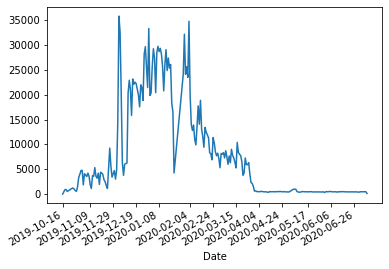

In [99]:
ts=pd.Series(dt.spends,index=dt.index)
ixs=[]
j=0
for i in dt.index:
    if(j%20==0):
        ixs.append(i)
    j+=1
ax=ts.plot()
ax.set_xticks(ixs)
plt.show()

### Top 10 days with max total spendings

In [104]:
ts.sort_values(ascending=False).head(10)

Date
2019-12-04    35778.79
2020-02-03    34727.92
2019-12-30    33284.42
2019-12-05    32571.10
2020-01-30    32135.58
2020-01-07    29697.23
2019-12-27    29621.75
2020-01-09    29302.13
2020-01-03    29216.43
2020-01-14    29035.37
Name: spends, dtype: float64

### Total clicks vs time

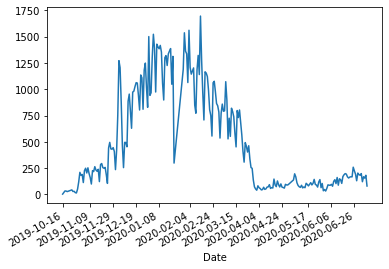

In [105]:
ts=pd.Series(dt.clicks,index=dt.index)
ixs=[]
j=0
for i in dt.index:
    if(j%20==0):
        ixs.append(i)
    j+=1
ax=ts.plot()
ax.set_xticks(ixs)
plt.show()

### Total impressions vs time

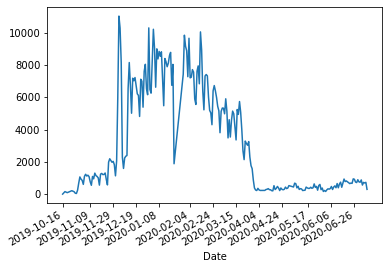

In [106]:
ts=pd.Series(dt.impressions,index=dt.index)
ixs=[]
j=0
for i in dt.index:
    if(j%20==0):
        ixs.append(i)
    j+=1
ax=ts.plot()
ax.set_xticks(ixs)
plt.show()

### Stats/post vs time

In [109]:
dt1=goog.groupby('Date').agg('mean')

### Impressions/post vs time

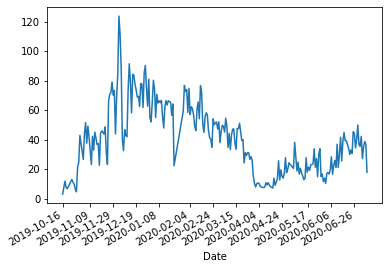

In [110]:
ts=pd.Series(dt1.impressions,index=dt.index)
ixs=[]
j=0
for i in dt.index:
    if(j%20==0):
        ixs.append(i)
    j+=1
ax=ts.plot()
ax.set_xticks(ixs)
plt.show()

### Spends/post vs Day

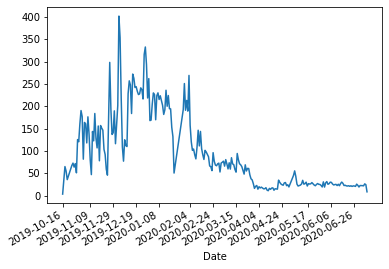

In [111]:
ts=pd.Series(dt1.spends,index=dt.index)
ixs=[]
j=0
for i in dt.index:
    if(j%20==0):
        ixs.append(i)
    j+=1
ax=ts.plot()
ax.set_xticks(ixs)
plt.show()

In [113]:
ts.sort_values(ascending=False).head(10)

Date
2019-12-04    402.008876
2019-12-05    354.033696
2019-12-27    332.828652
2019-12-26    316.154382
2019-11-26    298.375161
2019-12-28    293.514828
2019-12-16    272.235176
2020-02-03    269.208682
2019-12-17    262.998690
2019-12-30    262.082047
Name: spends, dtype: float64

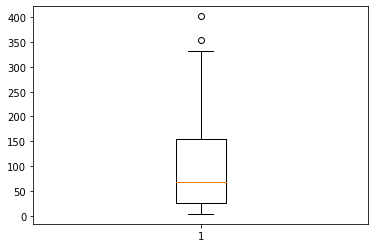

In [134]:
x=plt.boxplot(dt1['spends'])

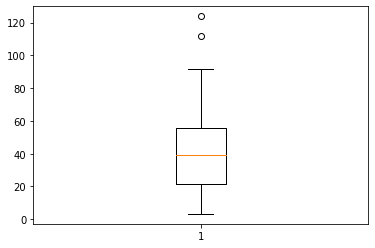

In [135]:
x=plt.boxplot(dt1['impressions'])

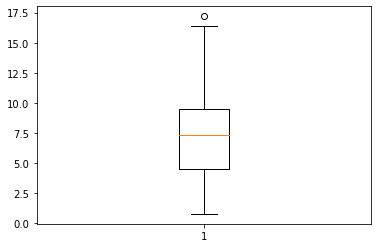

In [136]:
x=plt.boxplot(dt1['clicks'])

## Vs Day of Week

### By total activity

In [118]:
wk=goog.groupby('Day').agg('sum')
wk['impressions'].sort_values()

Day
Sunday        82762
Saturday     103256
Tuesday      106342
Wednesday    115753
Monday       116262
Friday       125043
Thursday     127475
Name: impressions, dtype: int64

In [119]:
wk['clicks'].sort_values()

Day
Sunday       12529
Saturday     16499
Tuesday      17617
Wednesday    18352
Monday       19224
Friday       19445
Thursday     20399
Name: clicks, dtype: int64

In [120]:
wk['spends'].sort_values()

Day
Sunday       207020.98
Saturday     260901.30
Tuesday      265908.04
Wednesday    290455.10
Monday       293923.13
Friday       297183.44
Thursday     323611.27
Name: spends, dtype: float64

#### Insights
Sunday is the least active day, With Thursday recording most user interaction

### By activity per post

In [121]:
wk1=goog.groupby('Day').agg('mean')
wk1['impressions'].sort_values()

Day
Sunday       41.072953
Saturday     49.523261
Tuesday      49.949272
Wednesday    52.591095
Monday       53.233516
Friday       55.872654
Thursday     56.680747
Name: impressions, dtype: float64

In [122]:
wk1['spends'].sort_values()

Day
Sunday       102.739940
Tuesday      124.898093
Saturday     125.132518
Wednesday    131.965061
Friday       132.789741
Monday       134.580188
Thursday     143.891183
Name: spends, dtype: float64

## Channel

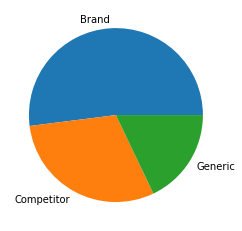

In [129]:
x=plt.pie(goog.subchannel.value_counts(),labels=goog.subchannel.unique())

In [152]:
ch=goog.groupby('subchannel').agg('mean')

In [153]:
ch

,spends,impressions,clicks
subchannel,,,
Brand,85.006601,37.919012,8.899402
Competitor,96.251069,34.759246,3.865015
Generic,222.531587,84.754842,9.623019


### Device

In [160]:
dev=goog.groupby(['device','age']).agg('mean')

In [161]:
dev

spends  impressions     clicks
device  age                                             
Desktop 18-24          74.715249    16.909004   3.661877
        25-34         197.913343    47.344383   9.406998
        35-44         103.047621    24.032350   4.903901
        45-54          36.314884     8.853009   1.781250
        55-64          14.484371     3.903226   0.725806
        65 or more     15.138112     3.760490   0.741259
        Undetermined  127.322359    49.879741   7.095282
Mobile  18-24         327.192010   104.845557  20.955134
        25-34         408.412022   152.589501  29.006885
        35-44         130.157697    53.947461   9.994746
        45-54          36.224136    16.948667   3.005923
        55-64          13.639404     6.723325   1.132754
        65 or more     19.051707     8.715536   1.551422
        Undetermined  237.802756   191.574505  16.851852
Tablet  18-24           9.670297     2.776952   0.423792
        25-34           5.294820     2.481994   0.362881
        35-44           4.667540     1.609626   0.219251
        45-54           2.995310     1.613793   0.310345
        55-64           4.925833     1.395833   0.229167
        65 or more      2.133611     1.375000   0.166667
        Undetermined    3.725988     1.968023   0.252907